讀取松山觀測站的資料<br/>
試圖使用時間、氣壓、相對溼度、風速、風向 來預測溫度<br/>
這樣如果三月時溫度計壞掉，也許還能使用其他資訊、透過本程式的預測函式來判斷溫度<br/>
<br/>
結果發現誤差在四度以內，可供作參考

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 
import numpy as np 
import pandas as pd 
import pickle 
import quandl 
from datetime import datetime
from selenium import webdriver
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#我只是import 爽的...

輸入原本的網址，http://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0AH70&stname=%25E6%259D%25BE%25E5%25B1%25B1&datepicker=2019-03-31<br/>因為要一次抓取整個三月份的資料，<br/>所以需要將最後的日期特定字元(03-31)作為變數來讀取

In [3]:
a="http://e-service.cwb.gov.tw/HistoryDataQuery/DayDataController.do?command=viewMain&station=C0AH70&stname=%25E6%259D%25BE%25E5%25B1%25B1&datepicker=2019-03-31"
rw=list(a)

In [55]:
data=[]
for i in range(1,32):
    a=rw
    
    a[-2]=str(int(i/10))
    a[-1]=str(i%10)
    if i==20: continue
    a=''.join(a)
    data.append(a)

取得松山測站三月份的全部觀測資料<br/>
做初步資料整理後  併入一個名為df的list裡面

In [56]:
len(data)

30

In [77]:
df=[]
col_n = ['ObsTime','StnPres','Temperature','RH','WS','WD',]
for i in range(0,len(data)):
    a=pd.read_html(data[i])
    a=a[1].dropna()
    a.columns=list(a.loc[2])
    a=a.drop(1)
    a=a.drop(2)
    a = pd.DataFrame(a,columns = col_n)
    a=a.reset_index(drop=True)
    
    df.append(a)

提取出溫度的資料，彙整成一個array

In [108]:
tempreture=[]
for i in range(len(df)):
    tempreture.append(np.array(df[i].Temperature))
tempreture=np.array(tempreture).astype('float64')

In [110]:
tempreture=tempreture.reshape(-1,1)

排除溫度的資料<br/>做成另一個DataFrame

In [85]:
df2=[]
for i in range(len(df)):
    df2.append(df[i].drop(columns=['Temperature']))
    df2[i]=np.array(df2[i])

In [87]:
datas=[]
for i in range(len(df)):
    datas.append(list(df2[i]))

將DataFrame整理成我們需要的格式

In [91]:
datas=np.array(datas).reshape(-1,5)

分割資料成為訓練與測試資料<br/>開始訓練

In [111]:
datas_train,datas_test,tempreture_train,tempreture_test=train_test_split(datas,tempreture,test_size=0.3,random_state=87)

In [112]:
predicts=LinearRegression()

In [113]:
predicts.fit(datas_train,tempreture_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
result=predicts.predict(datas_test)

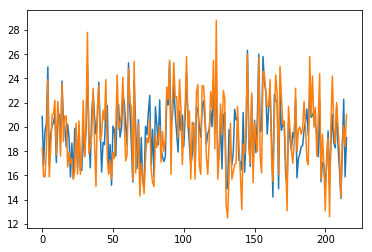

In [117]:
plt.plot(result)
plt.plot(tempreture_test)

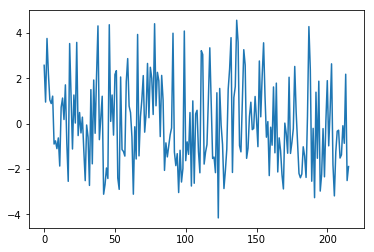

In [121]:
plt.plot(result-tempreture_test) #結果顯示誤差小於四

將資料做排序後，印出來查看差距

In [148]:
result=result.reshape(-1,1)

In [163]:
A=np.hstack((result,tempreture_test))

In [168]:
A=np.sort(A,axis=0)

In [182]:
resultAfterSort,tempreAfterSort=np.split(A,2,axis=1)

Text(0.5,1,'Result')

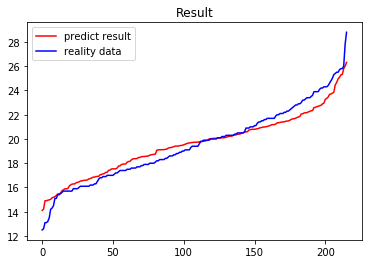

In [191]:
plt.plot(resultAfterSort,'r',label='predict result')
plt.plot(tempreAfterSort,'b',label='reality data')
plt.legend(loc='best')
plt.title('Result')